# PRACTICA 3 - ANDRÉS CABERO

## ALGORITMO ABC CON FUNCIÓN LINKAGE

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
U=np.asarray([[0,   0.2,  0.2,  0.35, 0.35],
             [0.2,  0,    0.15, 0.35, 0.35],
             [0.2,  0.15, 0,    0.35, 0.35],
             [0.35, 0.35, 0.35, 0,    0.1 ],
             [0.35, 0.35, 0.35, 0.1,  0   ]])

In [3]:
Z = linkage(U, method='single', metric='chebyshev')
Z

/home/andres/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


array([[3.  , 4.  , 0.1 , 2.  ],
       [1.  , 2.  , 0.15, 2.  ],
       [0.  , 6.  , 0.2 , 3.  ],
       [5.  , 7.  , 0.35, 5.  ]])

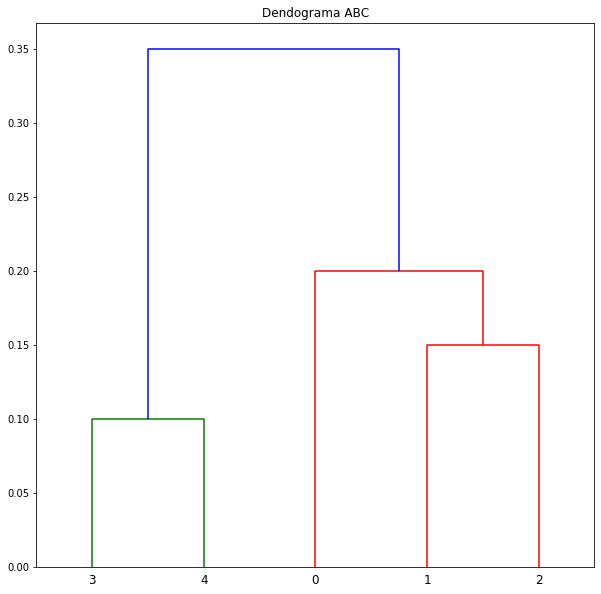

In [4]:
plt.figure(figsize=(10,10))
plt.title("Dendograma ABC")
dendrogram(Z)
plt.show()

## ALGORITMO ABC CON CALCULO DE LA MATRIZ LINKAGE

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [6]:
U=np.asarray([[0,   0.2,  0.2,  0.35, 0.35],
             [0.2,  0,    0.15, 0.35, 0.35],
             [0.2,  0.15, 0,    0.35, 0.35],
             [0.35, 0.35, 0.35, 0,    0.1 ],
             [0.35, 0.35, 0.35, 0.1,  0   ]])

#Borramos (cambiando el valor por infinito), el triangulo inferior de la matriz
lowInd = np.tril_indices_from(U)
U[lowInd] = np.inf

In [7]:
#Lista para guardar los clusters con su respectivo valor
clust = list(range(U.shape[1]))
#Lista con la posicion de los clusters en las columnas de la matriz
clustInd = list(range(U.shape[1]))
#Lista con las alturas (distancias) de cada cluster
height = [0]*U.shape[1]
#Lista con la cantidad de nodos en cada cluster, incluyendo los clusters con solo un nodo
nClust = [1]*U.shape[1]
for k in range(U.shape[1]-1):
    
#Buscamos el mínimo de la matriz ultramétrica
    minIndex = np.where(U == np.amin(U))
    i,j = minIndex[0][0], minIndex[1][0]
    
#Guardamos el cluster de mínima distancia elegido
    newClust = [clustInd[i], clustInd[j]]
    clust.append(newClust)
    
#Guardamos la altura (distancia) del cluster y su cantidad de nodos
    height.append(float(U[minIndex][0]))
    nClust.append(nClust[clustInd[i]]+nClust[clustInd[j]])
    
#Borramos la columna del cluster elegido y cambiamos la posicion de los clusters en las columnas
    U[:,j] = np.inf
    clustInd[i] = k + U.shape[1]

In [8]:
#Creamos la matriz linkage ordenando los valores obtenidos
link = []
for i in range(U.shape[1], 2*U.shape[1]-1):
    link.append([clust[i][0],clust[i][1],height[i],nClust[i]])
print(np.asarray(link))

[[3.   4.   0.1  2.  ]
 [1.   2.   0.15 2.  ]
 [0.   6.   0.2  3.  ]
 [7.   5.   0.35 5.  ]]


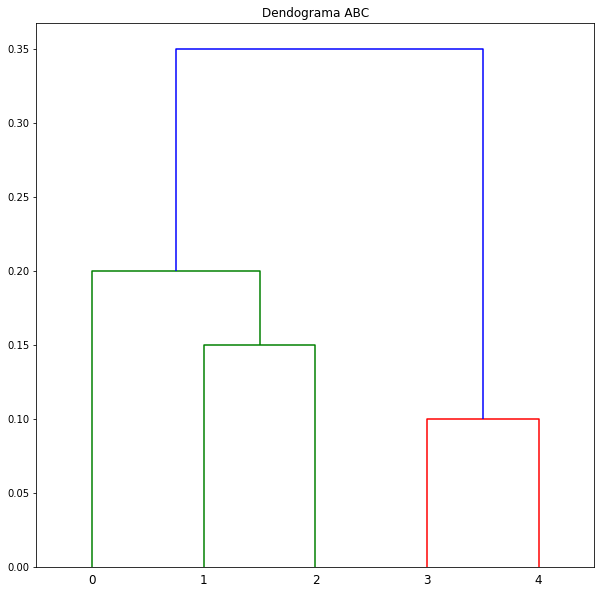

In [9]:
#Mostramos el dendograma
plt.figure(figsize=(10,10))
plt.title("Dendograma ABC")
dendrogram(link)
plt.show()

## ALGORITMO AC CON FUNCIÓN MÍNIMO

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [11]:
def acMinim(M):
#Cambiamos el triángulo inferior por infinitos 
    lowInd = np.tril_indices_from(M)
    M[lowInd] = np.inf
#Lista para guardar los clusters con su respectivo valor
    clust = list(range(M.shape[1]))

#Lista con la posicion de los clusters en las columnas de la matriz
    clustInd = list(range(M.shape[1]))

#Lista con las alturas (distancias) de cada cluster
    height = [0]*M.shape[1]

#Lista con la cantidad de nodos en cada cluster, incluyendo los clusters con solo un nodo
    nClust = [1]*M.shape[1]
    for k in range(M.shape[1]-1):

#Buscamos el mínimo de la matriz ultramétrica
        minIndex = np.where(M == np.amin(M))
        i,j = minIndex[0][0], minIndex[1][0]

#Guardamos el cluster de mínima distancia elegido
        newClust = [clustInd[i], clustInd[j]]
        clust.append(newClust)

#Guardamos la altura (distancia) del cluster y su cantidad de nodos
        height.append(float(M[minIndex][0]))
        nClust.append(nClust[clustInd[i]]+nClust[clustInd[j]])

#Cambiamos las distancias con el método del mínimo

# X<i<j columna i
# X<i<j columna j
        M[:i,i] = np.minimum(M[:i,i],M[:i,j])
        M[:i,j] = np.inf

# i<X<j fila i
# i<X<j columna j
        M[i,i+1:j] = np.minimum(M[i,i+1:j],M[i+1:j,j])
        M[i+1:j,j] = np.inf

# i<j<X fila i
# i<j<X fila j
        M[i,j+1:] = np.minimum(M[i,j+1:],M[j,j+1:])
        M[j,j+1:] = np.inf

# X=(i,j)
        M[i][j] = np.inf

        clustInd[i] = k + M.shape[1]

#Creamos la matriz linkage ordenando los valores obtenidos
    link = []
    for i in range(M.shape[1], 2*M.shape[1]-1):
        link.append([clust[i][0],clust[i][1],height[i],nClust[i]])

    return link

In [12]:
M = np.asarray([[0, 1, 3, 4, 7],
                [0, 0, 4, 4, 8],
                [0, 0, 0, 2, 8],
                [0, 0, 0, 0, 7],
                [0, 0, 0, 0, 0]], dtype="float")

link = acMinim(M)

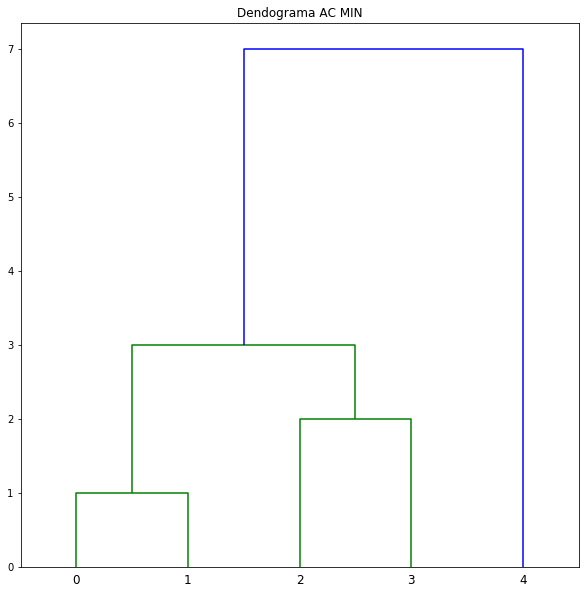

In [13]:
#Mostramos el dendograma
plt.figure(figsize=(10,10))
plt.title("Dendograma AC MIN")
dendrogram(link)
plt.show()

## ALGORITMO AC CON FUNCIÓN MÁXIMO

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [15]:
def acMaxim(M):
#Cambiamos el triángulo inferior por infinitos 
    lowInd = np.tril_indices_from(M)
    M[lowInd] = np.inf
#Lista para guardar los clusters con su respectivo valor
    clust = list(range(M.shape[1]))

#Lista con la posicion de los clusters en las columnas de la matriz
    clustInd = list(range(M.shape[1]))

#Lista con las alturas (distancias) de cada cluster
    height = [0]*M.shape[1]

#Lista con la cantidad de nodos en cada cluster, incluyendo los clusters con solo un nodo
    nClust = [1]*M.shape[1]

    for k in range(M.shape[1]-1):
    
#Buscamos el mínimo de la matriz ultramétrica
        minIndex = np.where(M == np.amin(M))
        i,j = minIndex[0][0], minIndex[1][0]
    
#Guardamos el cluster de mínima distancia elegido
        newClust = [clustInd[i], clustInd[j]]
        clust.append(newClust)
    
#Guardamos la altura (distancia) del cluster y su cantidad de nodos
        height.append(float(M[minIndex][0]))
        nClust.append(nClust[clustInd[i]]+nClust[clustInd[j]])
    
#Cambiamos las distancias con el método del máximo

# X<i<j columna i
# X<i<j columna j
        M[:i,i] = np.maximum(M[:i,i],M[:i,j])
        M[:i,j] = np.inf
    
# i<X<j fila i
# i<X<j columna j
        M[i,i+1:j] = np.maximum(M[i,i+1:j],M[i+1:j,j])
        M[i+1:j,j] = np.inf
    
# i<j<X fila i
# i<j<X fila j
        M[i,j+1:] = np.maximum(M[i,j+1:],M[j,j+1:])
        M[j,j+1:] = np.inf
    
# X=(i,j)
        M[i][j] = np.inf

        clustInd[i] = k + M.shape[1]
        
#Creamos la matriz linkage ordenando los valores obtenidos
    link = []
    for i in range(M.shape[1], 2*M.shape[1]-1):
        link.append([clust[i][0],clust[i][1],height[i],nClust[i]])
    print(np.asarray(link))
    
    return link

In [16]:
M = np.asarray([[0, 1, 3, 4, 7],
                [0, 0, 4, 4, 8],
                [0, 0, 0, 2, 8],
                [0, 0, 0, 0, 7],
                [0, 0, 0, 0, 0]], dtype="float")
link=acMaxim(M)

[[0. 1. 1. 2.]
 [2. 3. 2. 2.]
 [5. 6. 4. 4.]
 [7. 4. 8. 5.]]


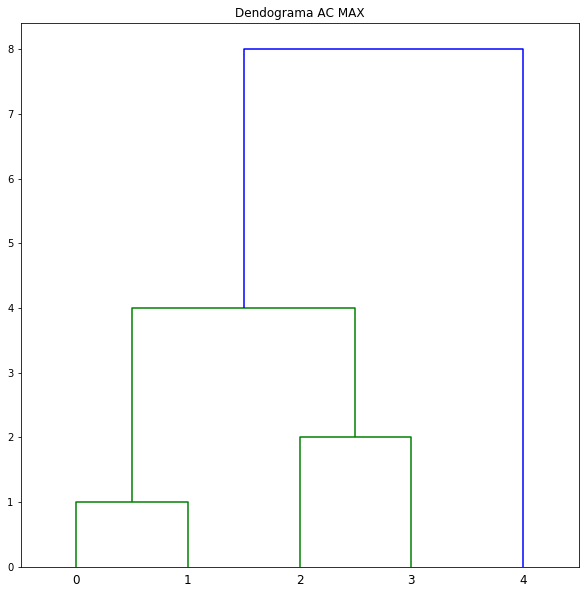

In [17]:
#Mostramos el dendograma
plt.figure(figsize=(10,10))
plt.title("Dendograma AC MAX")
dendrogram(link)
plt.show()

## ALGORITMO AC CON FUNCION LINKAGE (MIN Y MAX)

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [19]:
M = np.asarray([[0, 1, 3, 4, 7],
                [0, 0, 4, 4, 8],
                [0, 0, 0, 2, 8],
                [0, 0, 0, 0, 7],
                [0, 0, 0, 0, 0]], dtype="float")

In [20]:
Z = linkage(M, method='single', metric="chebyshev")
Z

array([[0., 1., 1., 2.],
       [2., 3., 2., 2.],
       [5., 6., 3., 4.],
       [4., 7., 7., 5.]])

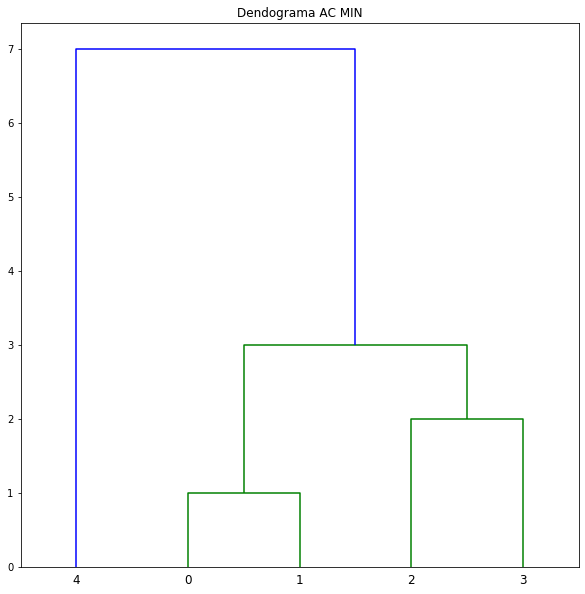

In [21]:
plt.figure(figsize=(10,10))
plt.title("Dendograma AC MIN")
dendrogram(Z)
plt.show()

In [22]:
Z = linkage(M, method='complete', metric='chebyshev')
Z

array([[0., 1., 1., 2.],
       [2., 3., 2., 2.],
       [5., 6., 4., 4.],
       [4., 7., 8., 5.]])

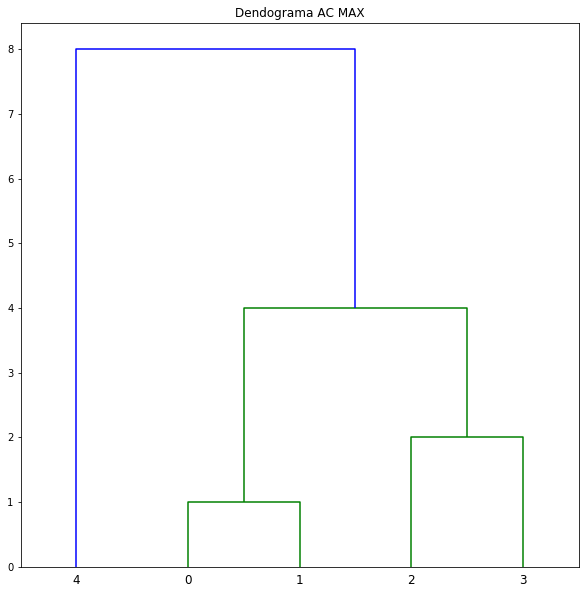

In [23]:
plt.figure(figsize=(10,10))
plt.title("Dendograma AC MAX")
dendrogram(Z)
plt.show()

## ALGORITMO WARD (EJEMPLO X)

In [24]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering as AC
from sklearn.preprocessing import StandardScaler

In [25]:
X = np.asarray([[1,   2],
                [2,   1],
                [2, 2.7],
                [5,   3],
                [6.5, 2],
                [7,   3]], dtype="float")
X = StandardScaler().fit_transform(X)

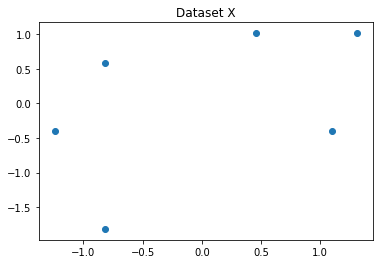

In [26]:
plt.title("Dataset X")
plt.scatter(X[:,0], X[:,1])
plt.show()

In [27]:
#Función que devuelve matriz linkage aplicando el método de Ward y los distintos agrupamientos de clusters posibles
def ward(D):
    
#Lista con los clusters según se crean
    clusts = [[i] for i in range(len(D))]

#Lista con la heterogeneidad de cada cluster
    clustsHet = [0 for i in range(len(D))]

#Lista con el número de instancias en cada cluster
    clustsNum = [1 for i in range(len(D))]
    
#Lista con los clusters creados y sus posición
    clustsIdx = [i for i in range(len(D))]
    
#Lista con los clusters según se aglomeran
    clustsIter = [[[i] for i in range(len(D))]]
    link = []
    
#Hasta que se unan todos los elementos en un cluster
    for _ in range(len(D)-1):
        bestHet = np.inf
        bestClust=[]

#Para todos los posibles clusters
        for i in range(len(clustsIdx)):
            for j in range(i+1, len(clustsIdx)):

#Unimos todos los elementos de los dos clusters en solo uno
                c = clusts[clustsIdx[i]] + clusts[clustsIdx[j]]
        
#Calculamos la heterogeneidad del nuevo cluster
                meanVector = np.mean(D[c], 0)
                clustHet = np.sum(np.square(D[c]-meanVector))

#Guardamos el cluster que genera menor heterogeneidad
                if(clustHet<bestHet):
                    bestHet=clustHet
                    bestClust=[clustsIdx[i],clustsIdx[j]]
#Contamos el número de clusters del nuevo cluster elegido y guardamos el cluster

        n=0
        realClust = []
        for i in bestClust:
            n+=clustsNum[i]
            clustsIdx.remove(i)
            realClust += clusts[i]
        
            
        clustsIdx.append(len(clusts))
        clustsNum.append(n)
        clusts.append(realClust)
        clustsHet.append(bestHet)
        
#Guardamos el conjunto de clusters de la iteración
        c = []
        for i in clustsIdx:
            c.append(clusts[i])
            
        clustsIter.append(c)
        link.append(bestClust + [np.sqrt(bestHet)] + [n])

    return [link,clustsIter]

In [28]:
Z = ward(X)
Z[0]

[[3, 5, 0.6011281739827491, 2],
 [0, 2, 0.7609082925482787, 2],
 [4, 6, 1.3119100175757084, 3],
 [1, 7, 1.7413681549840816, 3],
 [8, 9, 3.4641016151377544, 6]]

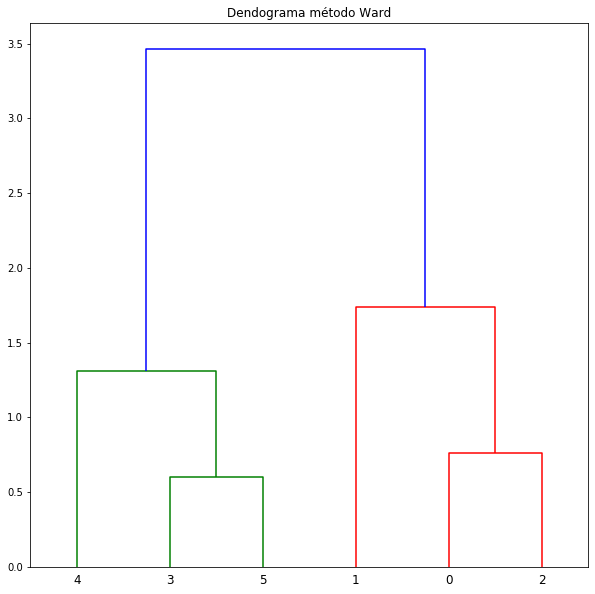

Configuración de 3 clusters: [[0, 2], [1], [3, 4, 5]]


In [29]:
#Pequeña función que devuelve una lista indexada ordenada según la función 'sorted'
def deepSort(X):
    ds=[]
    for i in X:
        ds.append(sorted(i))
    return sorted(ds)

plt.figure(figsize=(10,10))
plt.title("Dendograma método Ward")
dendrogram(Z[0])
plt.show()

nClusters=3
print("Configuración de 3 clusters:", deepSort(Z[1][len(X)-nClusters]))

In [30]:
Z = linkage(X, method='ward', metric='euclidean')
Z

array([[3.        , 5.        , 0.85012362, 2.        ],
       [0.        , 2.        , 1.07608683, 2.        ],
       [4.        , 6.        , 1.64909236, 3.        ],
       [1.        , 7.        , 2.2151215 , 3.        ],
       [8.        , 9.        , 3.80697493, 6.        ]])

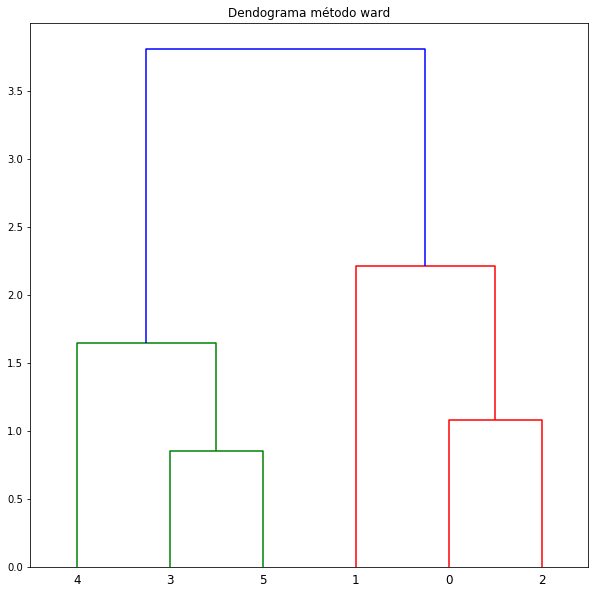

In [31]:
plt.figure(figsize=(10,10))
plt.title("Dendograma método ward")
dendrogram(Z)
plt.show()

## CLASIFICACION DE IRIS CON KMEDIAS Y AGLOMERATIVOS

In [32]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering as AC
from sklearn.metrics import accuracy_score as acScore
from scipy.stats import mode

In [33]:
#Función que devuelve las tasas de error de la clasificacion con clusters [INICIORANGO, FINRANGO) de kMeans con cross validation
def kMeansCV(D, INICIORANGO=3, FINRANGO=16, CAPAS=10):

#Iniciamos los datos
    X = StandardScaler().fit_transform(D.data)
    Y = D.target

    RANGO = range(INICIORANGO,FINRANGO)

    acierto = [0 for _ in RANGO]
    for k in RANGO:
        skf = StratifiedKFold(n_splits=CAPAS, random_state=0)
        skf = skf.split(X, Y)
        kmeans = KMeans(n_clusters=k, random_state=0)

        for train_index, test_index in skf:

    #Se entrena el modelo y se calcula la prediccion del conjunto de test
            kmeans.fit(X[train_index])
            predCluster = kmeans.predict(X[test_index])
            clusters = kmeans.labels_

    #Se calcula la clase asociada a cada cluster según la clase moda de cada cluster
            moda = [[] for _ in range(k)]
            for j in range(len(train_index)):
                moda[clusters[j]].append(Y[train_index[j]])      
            moda = np.asarray([max(e, key=e.count) for e in moda])

    #Se establece la prediccion hecha por el modelo al conjunto de test
            pred = moda[predCluster]     

    #Sumamos el porcentaje de acierto para cada capa
            acierto[k-INICIORANGO] += acScore(pred, Y[test_index]) / CAPAS

    return acierto

In [34]:
#Función que devuelve las tasas de error de la clasificacion con clusters [INICIORANGO, FINRANGO) de kMeans

def kMeans(D,  INICIORANGO=3, FINRANGO=16):

    X = StandardScaler().fit_transform(D.data)
    Y = D.target
    RANGO = range(INICIORANGO,FINRANGO)
    acierto = [0 for _ in RANGO]
    
    for k in RANGO:
        kmeans = KMeans(n_clusters=k, random_state=0)

    #Se entrena el modelo y se calcula la prediccion del conjunto de test
        clusters = kmeans.fit_predict(X,Y)
        
    #Se calcula la clase asociada a cada cluster según la clase moda de cada cluster
        moda = [[] for _ in range(k)]
        for i in range(len(X)):
            moda[clusters[i]].append(Y[i])
        moda = np.asarray([max(e, key=e.count) for e in moda])

    #Se establece la prediccion hecha por el modelo al conjunto de test
        pred = moda[clusters]

    #Sumamos el porcentaje de acierto para cada capa
        acierto[k-INICIORANGO] = acScore(pred, Y)

    return acierto

In [35]:
#Función que devuelve las tasas de error de las clasificaciones con clusters [INICIORANGO, FINRANGO) de un metodo aglomerativo
def agglClust(D, linkage="ward", affinity="euclidean",  INICIORANGO=3, FINRANGO=16):

    X = StandardScaler().fit_transform(D.data)
    Y = D.target
    RANGO = range(INICIORANGO,FINRANGO)
    acierto = [0 for _ in RANGO]
    for k in RANGO:
        ac = AC(n_clusters=k, linkage=linkage, affinity=affinity)


    #Se entrena el modelo y se calcula la prediccion del conjunto de test
        clusters = ac.fit_predict(X,Y)

    #Se calcula la clase asociada a cada cluster según la clase moda de cada cluster
        moda = [[] for _ in range(k)]
        for i in range(len(X)):
            moda[clusters[i]].append(Y[i])
        moda = np.asarray([max(e, key=e.count) for e in moda])

    #Se establece la prediccion hecha por el modelo al conjunto de test
        pred = moda[clusters]     

    #Sumamos el porcentaje de acierto para cada capa
        acierto[k-INICIORANGO] = acScore(pred, Y)

    return acierto

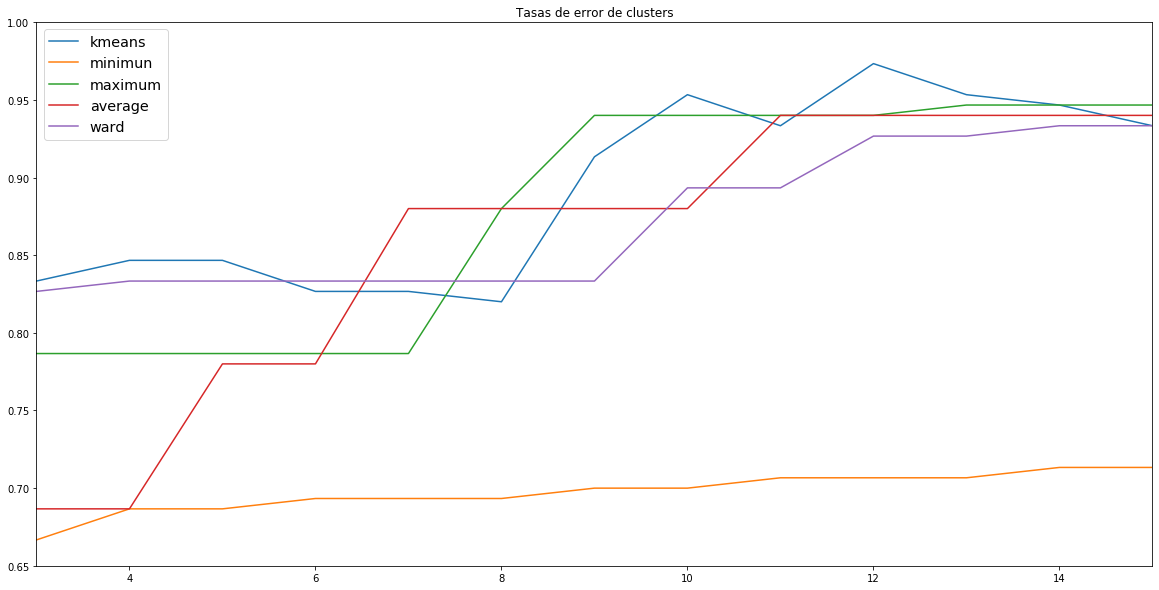

In [36]:
iris = load_iris()
plt.figure(figsize=(20,10))
plt.axis([3,15, 0.65,1])
plt.title("Tasas de acierto de clusters")
kmeans, = plt.plot(range(3,16), kMeans(iris), label="kmeans")
minim, = plt.plot(range(3,16), agglClust(iris, linkage="single"), label="minimun")
maxim, = plt.plot(range(3,16), agglClust(iris, linkage="complete"), label="maximum")
average, = plt.plot(range(3,16), agglClust(iris, linkage="average"), label="average")
ward, = plt.plot(range(3,16), agglClust(iris, linkage="ward"), label="ward")

leyendKmeans = plt.legend(handles=[kmeans, minim, maxim, average, ward], loc='best', fontsize='x-large')

plt.show()